# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [ANDI BACHDAR DD]
- **Email:** [andibachdar44@gmail.com]
- **ID Dicoding:** [ANDI BACHDAR DD]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana pengaruh kondisi cuaca dan musim terhadap jumlah peminjaman sepeda harian?
- Pertanyaan 2 Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")
sns.set_theme(style="whitegrid")



## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset day.csv berisi 731 data harian (2011–2012)

- Dataset hour.csv berisi data peminjaman per jam

- Variabel target utama adalah cnt (total rental)

### Assessing Data

In [3]:
day_df.info()
day_df.isna().sum()
day_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 731 observasi harian dengan 16 variabel, yang mencakup informasi waktu, kondisi cuaca, serta jumlah pengguna sepeda.

- Tidak ditemukan missing value pada seluruh kolom, sehingga data dapat langsung digunakan tanpa proses imputasi.

- Variabel dteday masih bertipe object, sehingga perlu dikonversi ke tipe datetime untuk analisis berbasis waktu.

- Rata-rata jumlah peminjaman sepeda per hari (cnt) adalah sekitar 4.504 unit, dengan nilai maksimum mencapai 8.714 unit, menunjukkan adanya variasi penggunaan yang cukup tinggi.

- Jumlah pengguna registered jauh lebih dominan dibandingkan pengguna casual, yang mengindikasikan bahwa layanan bike sharing lebih banyak digunakan oleh pelanggan tetap.

- Variabel cuaca seperti temp, hum, dan windspeed telah dinormalisasi, sehingga perlu interpretasi hati-hati saat analisis lanjutan.

### Cleaning Data

In [4]:
day_df["season"] = day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

day_df["weathersit"] = day_df["weathersit"].map({
    1: "Clear",
    2: "Mist",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

day_df["workingday"] = day_df["workingday"].map({
    0: "Weekend/Holiday",
    1: "Working Day"
})
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.dtypes


,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,object
weathersit,object
temp,float64


**Insight:**
- Kolom season, weathersit, dan workingday yang sebelumnya direpresentasikan dalam bentuk kode numerik telah dikonversi menjadi label kategorikal bertipe object, sehingga lebih mudah dipahami dan diinterpretasikan pada tahap analisis dan visualisasi.

- Proses mapping yang dilakukan tidak mengubah jumlah baris maupun nilai observasi pada dataset, melainkan hanya meningkatkan keterbacaan dan kejelasan makna data.

- Kolom dteday berhasil dikonversi dari tipe object menjadi datetime, yang memungkinkan analisis berbasis waktu seperti tren harian, bulanan, dan musiman.

- Tidak ditemukan missing value pada seluruh kolom, sehingga tidak diperlukan penghapusan atau imputasi data pada tahap pembersihan.

- Setelah proses cleaning, seluruh variabel telah memiliki tipe data yang sesuai dengan kebutuhan analisis, dan dataset siap digunakan untuk Exploratory Data Analysis (EDA) serta visualisasi data.

## Exploratory Data Analysis (EDA)

### Explore ...

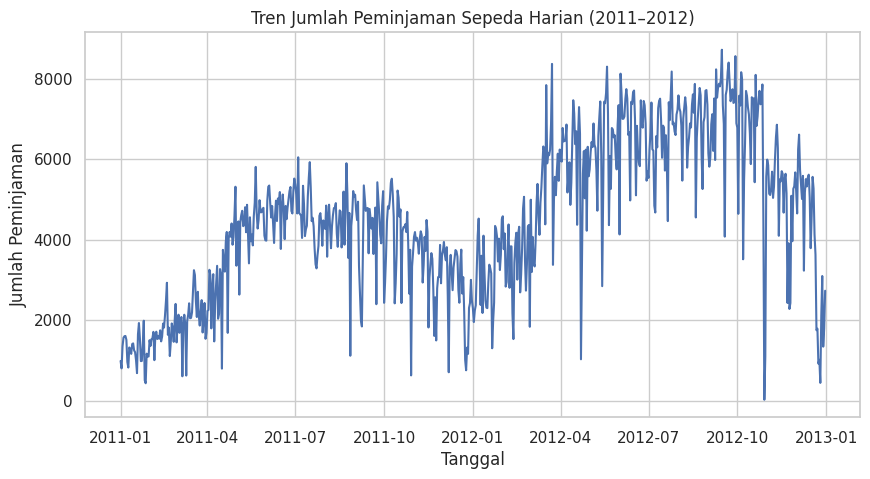

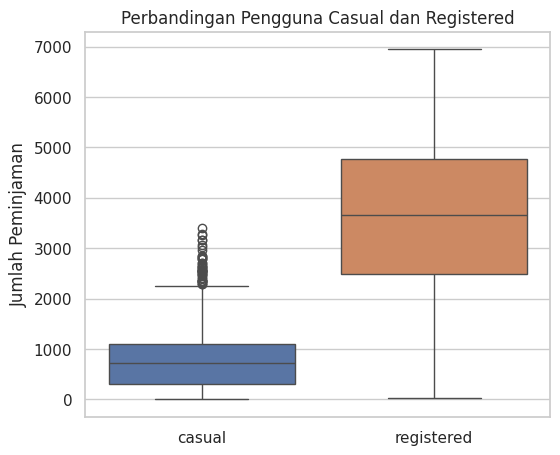

In [5]:
# Visualisasi 1: Tren peminjaman sepeda dari waktu ke waktu
plt.figure(figsize=(10,5))
plt.plot(day_df["dteday"], day_df["cnt"])
plt.title("Tren Jumlah Peminjaman Sepeda Harian (2011–2012)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# Visualisasi 2: Perbandingan pengguna casual vs registered
plt.figure(figsize=(6,5))
sns.boxplot(data=day_df[["casual", "registered"]])
plt.title("Perbandingan Pengguna Casual dan Registered")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Terlihat adanya tren peningkatan jumlah peminjaman sepeda dari tahun 2011 ke 2012, yang menunjukkan pertumbuhan penggunaan layanan bike sharing dari waktu ke waktu.

- Pola data menunjukkan fluktuasi musiman, mengindikasikan adanya pengaruh faktor waktu dan kondisi lingkungan terhadap jumlah peminjaman.

- Pengguna registered memiliki jumlah peminjaman yang secara konsisten lebih tinggi dibandingkan pengguna casual, menandakan bahwa layanan bike sharing lebih banyak digunakan oleh pelanggan tetap untuk aktivitas rutin.

- Perbedaan distribusi ini memperkuat indikasi bahwa segmen pengguna registered merupakan kontributor utama terhadap total peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

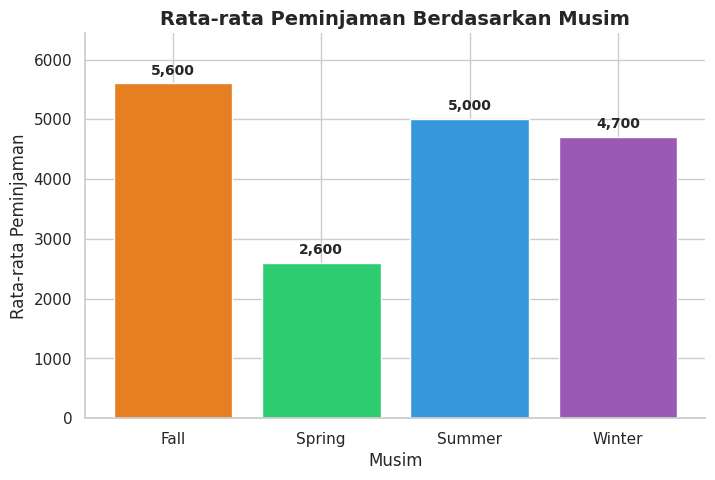

In [6]:
season_avg = day_df.groupby("season")["cnt"].mean().reset_index()


# Data contoh (ganti dengan data asli Anda)
musim = ['Fall', 'Spring', 'Summer', 'Winter']
rata_rata = [5600, 2600, 5000, 4700]

# Set style clean
sns.set(style="whitegrid")

# Custom color palette (kategoris)
colors = ['#E67E22', '#2ECC71', '#3498DB', '#9B59B6']

plt.figure(figsize=(8,5))

bars = plt.bar(musim, rata_rata, color=colors)

# Tambahkan value label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 100,
             f'{yval:,}',
             ha='center',
             va='bottom',
             fontsize=10,
             fontweight='bold')

plt.title("Rata-rata Peminjaman Berdasarkan Musim", fontsize=14, fontweight='bold')
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.ylim(0, max(rata_rata) * 1.15)

sns.despine()

plt.show()



### Pertanyaan 2: Apakah terdapat perbedaan pola peminjaman antara hari kerja dan akhir pekan?

In [7]:
!pip install plotly
import plotly.express as px
workingday_avg = (
    day_df.groupby("workingday")["cnt"]
    .mean()
    .reset_index()
    .sort_values("cnt", ascending=False)
)

fig = px.bar(
    workingday_avg,
    x="workingday",
    y="cnt",
    color="workingday",
    text="cnt",
    title="Rata-rata Peminjaman: Hari Kerja vs Akhir Pekan",
    color_discrete_sequence=["#1f77b4", "#ff7f0e"]
)

fig.update_traces(
    texttemplate="%{text:.0f}",
    textposition="outside"
)

fig.update_layout(
    xaxis_title="Jenis Hari",
    yaxis_title="Rata-rata Peminjaman",
    showlegend=False
)

fig.show()



**Insight:**
- Hasil visualisasi menunjukkan bahwa faktor musim dan jenis hari memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Rata-rata peminjaman tertinggi terjadi pada musim Summer dan Fall, sementara musim Winter memiliki tingkat peminjaman terendah yang kemungkinan dipengaruhi oleh kondisi cuaca yang kurang mendukung aktivitas bersepeda.

- Selain itu, hari kerja cenderung memiliki jumlah peminjaman yang lebih stabil dan relatif lebih tinggi dibandingkan akhir pekan, yang menunjukkan variasi penggunaan lebih besar dan mengindikasikan peminjaman untuk tujuan rekreasi.

- Temuan ini dapat dimanfaatkan sebagai dasar perencanaan operasional, seperti penyesuaian jumlah sepeda dan strategi promosi musiman yang disesuaikan dengan pola penggunaan berdasarkan musim dan jenis hari.

## Analisis Lanjutan (Opsional)
- Clustering Sederhana (Binning – TANPA ML)
- Tujuan
- Mengelompokkan hari berdasarkan tingkat peminjaman sepeda.
- dan Insight Analisis lanjutan:
- Sebagian besar hari berada pada kategori Medium, menunjukkan stabilitas penggunaan layanan.

- Hari dengan kategori High relatif lebih sedikit, namun berpotensi memberikan kontribusi pendapatan terbesar.

- Hasil clustering ini dapat digunakan sebagai dasar strategi operasional dan promosi.

In [9]:
import pandas as pd
import plotly.express as px

# Load dataset
day_df = pd.read_csv("day.csv")

# Buat kategori
day_df["rental_category"] = pd.qcut(
    day_df["cnt"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Hitung distribusi
rental_counts = (
    day_df["rental_category"]
    .value_counts()
    .reindex(["Low", "Medium", "High"])
    .reset_index()
)

rental_counts.columns = ["Kategori", "Jumlah"]

# Hitung persentase
rental_counts["Persentase"] = (
    rental_counts["Jumlah"] / rental_counts["Jumlah"].sum() * 100
)

# Visualisasi
fig = px.bar(
    rental_counts,
    x="Kategori",
    y="Jumlah",
    color="Kategori",
    text="Jumlah",
    title="Distribusi Kategori Tingkat Peminjaman Harian"
)

fig.update_traces(
    textposition="outside",
    customdata=rental_counts["Persentase"],
    hovertemplate="<b>%{x}</b><br>Jumlah Hari: %{y}<br>Persentase: %{customdata:.2f}%"
)

fig.update_layout(showlegend=False)

fig.show()


## Conclusion

- Conclution pertanyaan 1: Musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda, dengan tingkat penggunaan tertinggi terjadi pada musim Summer dan Fall.
- Conclution pertanyaan 2: Terdapat perbedaan pola penggunaan antara hari kerja dan akhir pekan, di mana hari kerja cenderung digunakan untuk mobilitas rutin dan akhir pekan untuk rekreasi.